In [1]:
import os
from lib.train_AI_lib import *

In [23]:
#os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

/content/APS360-2020Summer-Project


In [25]:
os.mkdir(os.getcwd()+"/temp/alex/")

FileExistsError: [Errno 17] File exists: '/content/APS360-2020Summer-Project/temp/alex/'

In [21]:
#'''Code for precalculating alexnet features
trainData, valData, testData = loadData(1, mode='alex')
for data in [trainData, valData, testData]:
    for img, _, imgName, _ in data:
        img = img.squeeze(0)
        torch.save(img, os.getcwd()+'/temp/alex/'+imgName[0].split('.jpg')[0])
#'''

In [19]:
class alexNetA(nn.Module):
  def __init__(self, name):
    super(alexNetA, self).__init__()
    self.name = name
    self.conv1 = nn.Conv2d(256, 50, 5, stride=2)
    self.conv2 = nn.Conv2d(50 , 10, 5, stride=2)
    self.fc1   = nn.Linear(5*5*10, 20)
    self.fc2   = nn.Linear(20, 1)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = x.view(-1, 5*5*10)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return(x)

calcNoParam(alexNetA(''))


337601


Epoch 0 | Time Taken: 9.30s | Training Error: 0.9846603360, Training loss: 23.9091394202 | Validation Error: 0.9883040936, Validation loss: 18.1032344928
Epoch 1 | Time Taken: 5.26s | Training Error: 0.9777209642, Training loss: 15.0777517329 | Validation Error: 0.9766081871, Validation loss: 12.6476429247
Epoch 2 | Time Taken: 4.79s | Training Error: 0.9693206720, Training loss: 12.2266489820 | Validation Error: 0.9561403509, Validation loss: 10.7493492343
Epoch 3 | Time Taken: 4.76s | Training Error: 0.9609203798, Training loss: 10.7775765266 | Validation Error: 0.9649122807, Validation loss: 9.7809459245
Epoch 4 | Time Taken: 4.79s | Training Error: 0.9583637692, Training loss: 9.6005773450 | Validation Error: 0.9473684211, Validation loss: 9.7211515315
Epoch 5 | Time Taken: 4.77s | Training Error: 0.9517896275, Training loss: 9.2544404886 | Validation Error: 0.9736842105, Validation loss: 9.1966686907
Epoch 6 | Time Taken: 4.77s | Training Error: 0.9532505478, Training loss: 8.9711

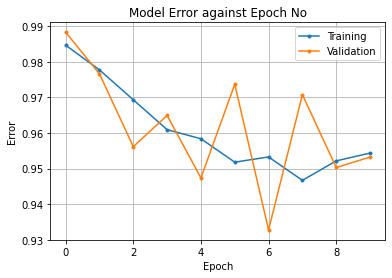

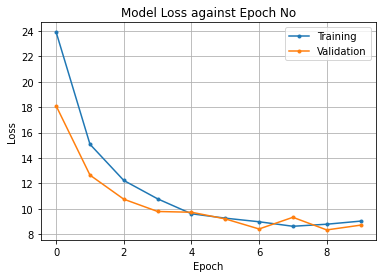

In [27]:
batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, testLoader = loadData(batchsize, inPath=os.getcwd()+'/temp/alex', mode='tensor')
net = alexNetA("alexNetA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, cuda=1)

Tested 99.96%

2900390625,
  -5.825313568115234,
  16.69690704345703,
  -0.42449188232421875,
  -21.790508270263672,
  -4.777202606201172,
  -8.270740509033203,
  -6.259254455566406,
  -3.8026885986328125,
  0.8368606567382812,
  1.7297325134277344,
  12.160444259643555,
  -2.450407028198242,
  12.431537628173828,
  12.032855987548828,
  5.426582336425781,
  -4.495588302612305,
  8.158756256103516,
  -1.2973213195800781,
  17.972320556640625,
  7.005561828613281,
  -5.074092864990234,
  -23.23471450805664,
  5.781597137451172,
  10.544910430908203,
  9.670394897460938,
  -2.4723892211914062,
  11.767890930175781,
  6.2551374435424805,
  5.380287170410156,
  11.573036193847656,
  4.214862823486328,
  4.394023895263672,
  6.090969085693359,
  1.4332351684570312,
  5.7077484130859375,
  18.860912322998047,
  5.522045135498047,
  11.286365509033203,
  18.01699447631836,
  1.5769119262695312,
  -8.06209945678711,
  -21.2109375,
  -10.962711334228516,
  4.797435760498047,
  15.055015563964844,
  -20.120536

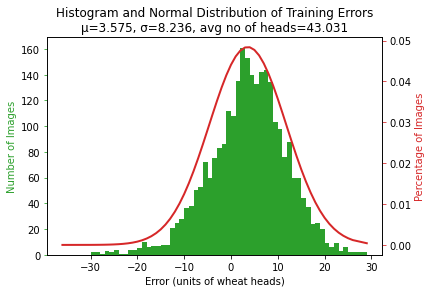

In [28]:
trainLoader, valLoader, testLoader = loadData(batchsize=1, inPath=os.getcwd()+'/temp/alex', mode='tensor')
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/alexNetA_b64_te10_lr0.001"
regresAnalysis(net, trainLoader, netPath)


Tested 99.71%

([0.304046630859375,
  -1.8774337768554688,
  -8.027751922607422,
  6.282276153564453,
  -6.001720428466797,
  -7.522346496582031,
  15.515007019042969,
  -13.601566314697266,
  -0.49451446533203125,
  11.057300567626953,
  2.3111038208007812,
  1.3689250946044922,
  6.908454895019531,
  1.6193466186523438,
  -11.291885375976562,
  1.2569580078125,
  13.343212127685547,
  7.660316467285156,
  14.089984893798828,
  -4.062328338623047,
  -3.9548721313476562,
  0.437713623046875,
  2.560771942138672,
  7.9029541015625,
  12.603134155273438,
  -0.2750091552734375,
  -11.25360107421875,
  14.66476058959961,
  1.8963546752929688,
  10.677833557128906,
  13.48465347290039,
  7.629825592041016,
  3.4082412719726562,
  7.223196029663086,
  -9.1544189453125,
  -3.4245872497558594,
  -3.8311729431152344,
  6.287776947021484,
  4.879657745361328,
  4.372467041015625,
  24.058887481689453,
  -0.9084396362304688,
  6.572242736816406,
  0.6333901882171631,
  -0.8362998962402344,
  5.069938659667969,


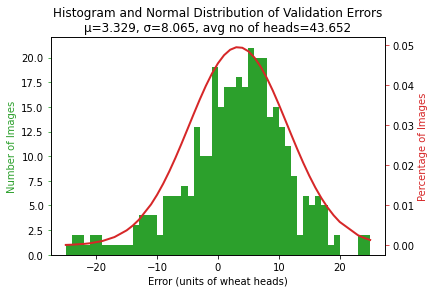

In [29]:
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/alexNetA_b64_te10_lr0.001"
regresAnalysis(net, valLoader, netPath, mode="val")

Tested 99.71%

([-1.2611312866210938,
  -2.477581024169922,
  4.794940948486328,
  3.119739532470703,
  11.296886444091797,
  5.9952545166015625,
  -28.7332763671875,
  -15.750255584716797,
  4.612934112548828,
  -3.561359405517578,
  0.6043224334716797,
  -10.075714111328125,
  10.905887603759766,
  13.687042236328125,
  8.908590316772461,
  3.128643035888672,
  2.4697952270507812,
  -0.22528457641601562,
  0.8576316833496094,
  -6.43282413482666,
  -2.955333709716797,
  18.61687469482422,
  4.126548767089844,
  17.491470336914062,
  9.37740707397461,
  9.859474182128906,
  21.42554473876953,
  3.912311553955078,
  7.013166427612305,
  -5.752113342285156,
  5.562557220458984,
  -9.39542007446289,
  -6.083187103271484,
  -8.675182342529297,
  -15.991096496582031,
  -1.5998706817626953,
  -13.159736633300781,
  1.1514663696289062,
  -1.4865913391113281,
  4.954673767089844,
  6.090023040771484,
  -4.246734619140625,
  7.0955047607421875,
  -7.795038223266602,
  1.3704338073730469,
  2.1568222045898438

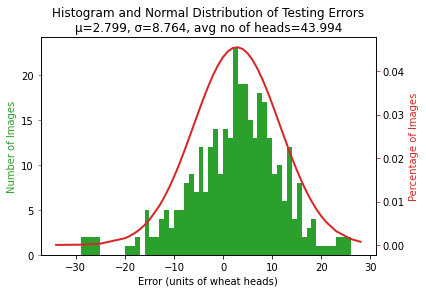

In [30]:
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/alexNetA_b64_te10_lr0.001"
regresAnalysis(net, testLoader, netPath, mode="test")